In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [2]:
file_path = "C:/Users/Mohammed Riyan H/OneDrive/Desktop/Projects/Satellite_Stability/real_time_satellite_data_with_edge_cases.csv"
data = pd.read_csv(file_path)

In [3]:
Angle =data[["Orientation"]]

In [4]:
def check_stability(Angle):
    if -45 <= Angle <= 45:
        return "Stable"
    else:
        return "Unstable"
def check_Tilt(Angle):
    if Angle > 0:
        return "Clockwise"
    elif Angle < 0:
        return "Counter Clockwise"
def check_status(Angle):
    if -45<=Angle <=45 :
        return "Ascends"
    else:
        return "Descends" 
def Tilt_side(Angle):
    if Angle==0:
        return "Straight"
    elif Angle <= -0.00000001:
        return "Left"
    else:
        return "Right"

In [5]:
data['Stability'] = data['Orientation'].apply(check_stability)
data['Rotation Direction'] = data['Orientation'].apply(check_Tilt)
data['Flight Status'] = data['Orientation'].apply(check_status)
data['Tilt Direction'] = data['Orientation'].apply(Tilt_side)

In [6]:
print(data[['Time','Latitude','Longitude','Altitude','Orientation','Stability','Rotation Direction','Flight Status','Tilt Direction']])

      Time   Latitude  Longitude     Altitude  Orientation Stability  \
0        0  12.971600    77.5947  1000.000000    -2.779696    Stable   
1        1  12.971601    77.5947  1010.836343    -2.104895    Stable   
2        2  12.971602    77.5947  1021.672687     4.506128    Stable   
3        3  12.971603    77.5947  1032.509030    -4.261908    Stable   
4        4  12.971603    77.5947  1043.345374     2.139876    Stable   
...    ...        ...        ...          ...          ...       ...   
7195  7195  12.971597    77.5947  1043.345374     3.316489    Stable   
7196  7196  12.971597    77.5947  1032.509030    -0.620950    Stable   
7197  7197  12.971598    77.5947  1021.672687    -3.548089    Stable   
7198  7198  12.971599    77.5947  1010.836343    -0.037330    Stable   
7199  7199  12.971600    77.5947  1000.000000    -2.758738    Stable   

     Rotation Direction Flight Status Tilt Direction  
0     Counter Clockwise       Ascends           Left  
1     Counter Clockwise  

In [7]:
data.to_csv("Satellite_Stability_Status.csv",index = False)
print("\n Fianl Comphrensive Satellite Data Saved As Satellite)Stabillity_Status.csv")


 Fianl Comphrensive Satellite Data Saved As Satellite)Stabillity_Status.csv


In [8]:
data.head()

,Time,Latitude,Longitude,Altitude,Orientation,Stability,Rotation Direction,Flight Status,Tilt Direction
0,0,12.971600,77.5947,1000.000000,-2.779696,Stable,Counter Clockwise,Ascends,Left
1,1,12.971601,77.5947,1010.836343,-2.104895,Stable,Counter Clockwise,Ascends,Left
2,2,12.971602,77.5947,1021.672687,4.506128,Stable,Clockwise,Ascends,Right
3,3,12.971603,77.5947,1032.509030,-4.261908,Stable,Counter Clockwise,Ascends,Left
4,4,12.971603,77.5947,1043.345374,2.139876,Stable,Clockwise,Ascends,Right


In [9]:
features = ['Orientation']
X = data[features]
Y = data['Stability']

In [10]:
X_Train,X_Test , Y_Train ,Y_Test = train_test_split(X,Y,train_size = .8,random_state = 42)

In [11]:
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

In [12]:
model = LogisticRegression()
model.fit(X_Train,Y_Train)

LogisticRegression()

In [13]:
Y_Pred = model.predict(X_Test)

In [14]:

accuracy = accuracy_score(Y_Test ,Y_Pred)
print(f"Accuracy :{accuracy*100 :2f}%")
print("Classification Report :")
print(classification_report(Y_Test,Y_Pred))
print("\nConfusion Matrix")
print(confusion_matrix(Y_Test,Y_Pred))

Accuracy :99.930556%
Classification Report :
              precision    recall  f1-score   support

      Stable       1.00      1.00      1.00      1439
    Unstable       0.00      0.00      0.00         1

    accuracy                           1.00      1440
   macro avg       0.50      0.50      0.50      1440
weighted avg       1.00      1.00      1.00      1440


Confusion Matrix
[[1439    0]
 [   1    0]]


C:\Users\Mohammed Riyan H\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammed Riyan H\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammed Riyan H\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

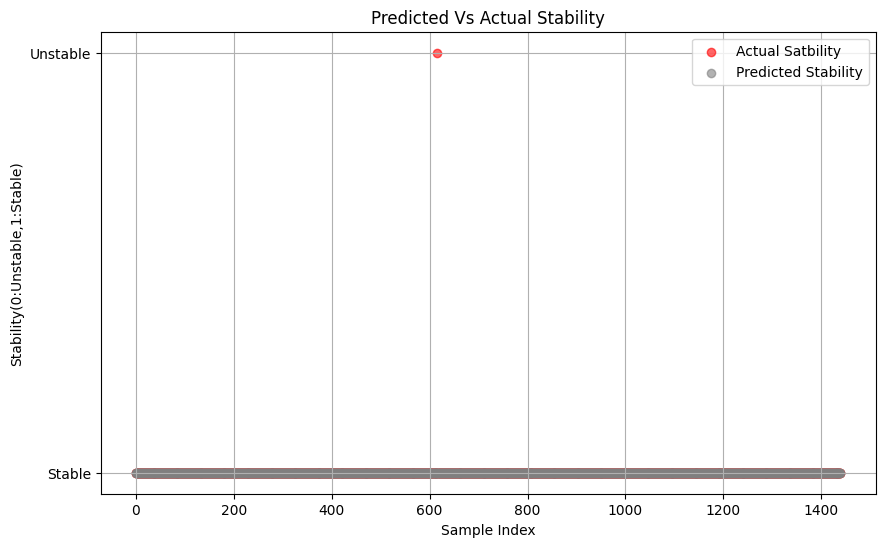

In [15]:
plt.figure(figsize = (10 ,6))
plt.scatter(range(len(Y_Test)),Y_Test,color = 'red',label = 'Actual Satbility',alpha = .6)
plt.scatter(range(len(Y_Pred)),Y_Pred ,color = 'grey',label = 'Predicted Stability',alpha = .6)
plt.title("Predicted Vs Actual Stability")
plt.xlabel("Sample Index")
plt.ylabel("Stability(0:Unstable,1:Stable)")
plt.legend()
plt.grid(True)
plt.show()
plt.style.use('classic')